<a href="https://colab.research.google.com/github/JosephKiburu/Moringa-Core/blob/main/Joseph_Kiburu_WEEK_1_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSESSMENT QUESTION**

This is the fifa ranking report. The keynote of this report is to analyse how factors such as ranking determines how well a team performs in matches or how results in a certain match are affected by ranking and other factors such as the type of tournament. You can find the dataset [here](https://drive.google.com/file/d/1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc/view ).

**SPECIFYING THE QUESTION**

To predict how a team's world ranking and tournament can affect the results of a game. On top of that we will also look at how these variables can be used to classify the status of a match i.e whether a team wins, draws or loses.

**DEFINING THE METRIC FOR SUCCESS**

We will focus on creating different train and test sets for our different regression models to either predict game results or classify our independent variables. To achieve this we will use predictor variables that contain data believed to be predictive of the outcome variable.



**UNDERSTANDING THE CONTEXT**

We are dealing with two datasets each with predictor variables we intend on using and each with a target variable we intend on either predicting or classify under. We have the results dataset which has different tournament matches played by the home and away teams and the full time game scores. The fifa ranking dataset has the country rankings which are vital in creating our models. 



**EXPERIMENTAL DESIGN**

We expect the following workflow:
* Data cleaning and preparation
    * Loading libraries and datasets
    * Checking and dealing with missing values
    * Checking and dealing with duplicated values
    * Checking and dealing with outliers and anomalies
* Perform Exploratory Data Analysis (EDA)
* Perform any necessary feature engineering 
* Checking for multicollinearity
* Building our models
* Cross-validating the models
* Computing RMSE
* Assessing the heteroscedasticity of our model using Bartlett’s test
* Conclusion



**DATA RELEVANCE**

The following are the columns in our dataset:

* Rank- The world ranking of the teams.
* Country Abbreviation
* Total Points
* Previous Points
* Rank Change
* Average Previous Years Points
* Average Previous Years Points Weighted (50%)
* Average 2 Years Ago Points
* Average 2 Years Ago Points Weighted (30%)
* Average 3 Years Ago Points
* Average 3 Years Ago Points Weighted (20%)
* Confederation- The authority under which the game is being played.
* Date - date of the match
* Home_team - the name of the home team
* Away_team - the name of the away team
* Home_score - full-time home team score including extra time, not including penalty-shootouts
* Away_score - full-time away team score including extra time, not including penalty-shootouts
* Tournament - the name of the tournament
* City - the name of the city/town/administrative unit where the match was played
* Country - the name of the country where the match was played
* Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue



In [71]:
# importing our libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [72]:
# Loading our fifa ranking dataset

ranking=pd.read_csv('/content/fifa_ranking.csv')
ranking

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [73]:
# Loading our results dataset

results=pd.read_csv('/content/results.csv')
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


**DATA EXPLORATION**

In [74]:
# Previewing the top of our fifa ranking dataset

ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [75]:
# Determining the number of records in our fifa ranking dataset

ranking.shape

(57793, 16)

In [76]:
# Previewing the top of our results dataset

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [77]:
# Determining the number of records in our results dataset

results.shape

(40839, 9)

**DATA WRANGLING: CHECKING THE DATA AND TIDYING THE DATASETS**

In [78]:
# Checking for null values in our fifa ranking dataset

ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [79]:
# checking for null values in our results dataset

results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [80]:
# Checking for duplicates in our fifa ranking dataset

ranking.duplicated().sum()

37

In [81]:
# Dropping the duplicates

ranking.drop_duplicates(inplace=True)
ranking.duplicated().sum()

0

In [82]:
# Checking for duplicates in our results dataset

results.duplicated().sum()

0

In [83]:
# checking column data types for our fifa ranking dataset

ranking.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [84]:
# Changing the rank date column to datetime
ranking['rank_date']=pd.to_datetime(ranking['rank_date'])

In [85]:
# Changing the column date to datetime

results['date']=pd.to_datetime(results['date'])

In [86]:
# Finding the home team ranking

home_merged = results.merge(ranking, left_on=['home_team'], right_on=['country_full'], how='inner')
home_merged.rename(columns={'rank':'home_team_rank'},inplace=True)
home_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_team_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,30,Scotland,SCO,0.0,43,-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,28,Scotland,SCO,0.0,41,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,29,Scotland,SCO,0.0,43,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,25,Scotland,SCO,0.0,43,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,24,Scotland,SCO,0.0,45,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-12-23


In [87]:
# Finding the away team rank
away_merged = results.merge(ranking, left_on=['away_team'], right_on=['country_full'], how='inner')
away_merged.rename(columns={'rank':'away_team_rank'},inplace=True)
away_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,away_team_rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,England,ENG,0.0,55,-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,5,England,ENG,0.0,52,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-09-23
2,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,10,England,ENG,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-10-22
3,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,8,England,ENG,0.0,54,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-11-19
4,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,England,ENG,0.0,56,-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-12-23


In [88]:
# Our datasets are huge. Considering matches played start from 1872 to 2019 and the fact that there are multiple 
# ranking dates per year, we expect a large dataset. I'll focus on games played from 2010 to 2019 and games played in either 
# a friendly or a world cup.

# Creating a new year column
home_merged['date']=pd.to_datetime(home_merged['date'])
away_merged['date']=pd.to_datetime(away_merged['date'])

home_merged['year']=home_merged['date'].dt.year
away_merged['year']=away_merged['date'].dt.year

In [89]:
# selecting years from 2010 and games played as a friendly or a world cup matcch since these two matches
# mainly predict the ranking

home_merged=home_merged[(home_merged['year'] > 2009) & (home_merged['tournament'].isin(['Friendly','World Cup']))]
away_merged=away_merged[(away_merged['year'] > 2009) & (away_merged['tournament'].isin(['Friendly','World Cup']))]

In [90]:
print(home_merged.shape)
print(away_merged.shape)

(855416, 26)
(844782, 26)


In [91]:
# Selecting the necessary columns

home_merged=home_merged[['home_team','home_score','away_team','away_score','home_team_rank','tournament']]
home_merged

,home_team,home_score,away_team,away_score,home_team_rank,tournament
96096,Scotland,1,Czech Republic,0,30,Friendly
96097,Scotland,1,Czech Republic,0,28,Friendly
96098,Scotland,1,Czech Republic,0,29,Friendly
96099,Scotland,1,Czech Republic,0,25,Friendly
96100,Scotland,1,Czech Republic,0,24,Friendly
...,...,...,...,...,...,...
10268802,Myanmar,0,Indonesia,2,142,Friendly
10268803,Myanmar,0,Indonesia,2,142,Friendly
10268804,Myanmar,0,Indonesia,2,135,Friendly
10268805,Myanmar,0,Indonesia,2,135,Friendly


In [92]:
away_merged=away_merged[['home_team','home_score','away_team','away_score','away_team_rank','tournament']]
away_merged

,home_team,home_score,away_team,away_score,away_team_rank,tournament
129844,Japan,1,England,2,11,Friendly
129845,Japan,1,England,2,5,Friendly
129846,Japan,1,England,2,10,Friendly
129847,Japan,1,England,2,8,Friendly
129848,Japan,1,England,2,11,Friendly
...,...,...,...,...,...,...
10191007,Singapore,1,Myanmar,2,142,Friendly
10191008,Singapore,1,Myanmar,2,142,Friendly
10191009,Singapore,1,Myanmar,2,135,Friendly
10191010,Singapore,1,Myanmar,2,135,Friendly


In [93]:
# This is still a very big dataset, we should do some sampling.
# We will create a sample size of 10,000 and use the tournament column to maintain the population proportion of
# friendly and world cup matches.

home_merged=home_merged.groupby('tournament', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.001169))
home_merged


,home_team,home_score,away_team,away_score,home_team_rank,tournament
9311992,Oman,6,Malaysia,0,91,Friendly
5382536,Cuba,1,Nicaragua,1,78,Friendly
2130237,Finland,3,Turkey,2,43,Friendly
9925027,Slovenia,1,Scotland,1,117,Friendly
9730588,United Arab Emirates,4,Philippines,0,64,Friendly
...,...,...,...,...,...,...
8519081,Kuwait,1,Uzbekistan,0,95,Friendly
9776106,Liechtenstein,1,Switzerland,2,158,Friendly
1922681,Chile,2,Egypt,1,18,Friendly
9874785,Namibia,3,Zimbabwe,1,123,Friendly


In [94]:
# We will do the same for the away_merged dataset

away_strat = away_merged.groupby('tournament', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.0011837))
away_strat

,home_team,home_score,away_team,away_score,away_team_rank,tournament
2140949,Israel,2,Finland,1,55,Friendly
9252884,Laos,0,United Arab Emirates,3,68,Friendly
3514399,United States,1,Mexico,0,26,Friendly
6575767,Luxembourg,1,Nigeria,3,71,Friendly
2533569,Russia,1,Brazil,1,1,Friendly
...,...,...,...,...,...,...
1224762,Austria,1,Switzerland,2,44,Friendly
4770496,Uganda,0,Kenya,0,70,Friendly
5510181,Japan,0,Venezuela,0,56,Friendly
5526825,Iran,1,Venezuela,0,66,Friendly


In [95]:
# merging the dataframes

merged=home_merged.merge(away_merged,how='inner', on=['home_team','away_team','tournament','home_score','away_team','away_score'])
merged

,home_team,home_score,away_team,away_score,home_team_rank,tournament,away_team_rank
0,Oman,6,Malaysia,0,91,Friendly,75
1,Oman,6,Malaysia,0,91,Friendly,77
2,Oman,6,Malaysia,0,91,Friendly,79
3,Oman,6,Malaysia,0,91,Friendly,77
4,Oman,6,Malaysia,0,91,Friendly,79
...,...,...,...,...,...,...,...
272089,Thailand,3,Philippines,0,140,Friendly,123
272090,Thailand,3,Philippines,0,140,Friendly,122
272091,Thailand,3,Philippines,0,140,Friendly,113
272092,Thailand,3,Philippines,0,140,Friendly,111


In [96]:
merged.duplicated().sum()

209656

In [97]:
merged.drop_duplicates(inplace=True)
merged.shape

(62438, 7)

In [98]:
# Creating a sample of 10,000 for our modelling using the tournament column to maitain our proportion


merged = merged.groupby('tournament', group_keys=False).apply(lambda grouped_subset:grouped_subset.sample(frac=0.1636))
merged

,home_team,home_score,away_team,away_score,home_team_rank,tournament,away_team_rank
167066,Morocco,0,Gambia,1,59,Friendly,65
172284,Poland,0,Lithuania,0,29,Friendly,76
145188,Jordan,0,Azerbaijan,2,57,Friendly,119
208160,Jordan,1,Kuwait,1,88,Friendly,109
34825,Vanuatu,0,New Caledonia,0,173,Friendly,134
...,...,...,...,...,...,...,...
88012,Denmark,1,Turkey,2,15,Friendly,8
19385,Morocco,1,Netherlands,2,39,Friendly,25
254855,United Arab Emirates,0,Venezuela,2,96,Friendly,92
122168,Tahiti,4,New Caledonia,3,141,Friendly,143


In [99]:
# Creating a new column 'status' for classification

condition=[
           (merged['home_score']==merged['away_score']),
           (merged['home_score']>merged['away_score']),
           (merged['home_score']<merged['away_score'])
]
values=['draw', 'win', 'lose']
merged['status']=np.select(condition, values)
merged

,home_team,home_score,away_team,away_score,home_team_rank,tournament,away_team_rank,status
167066,Morocco,0,Gambia,1,59,Friendly,65,lose
172284,Poland,0,Lithuania,0,29,Friendly,76,draw
145188,Jordan,0,Azerbaijan,2,57,Friendly,119,lose
208160,Jordan,1,Kuwait,1,88,Friendly,109,draw
34825,Vanuatu,0,New Caledonia,0,173,Friendly,134,draw
...,...,...,...,...,...,...,...,...
88012,Denmark,1,Turkey,2,15,Friendly,8,lose
19385,Morocco,1,Netherlands,2,39,Friendly,25,lose
254855,United Arab Emirates,0,Venezuela,2,96,Friendly,92,lose
122168,Tahiti,4,New Caledonia,3,141,Friendly,143,win


**EXPLORATORY DATA ANALYSIS**

In [100]:
# Encoding our tournament column. Since the tournament variable has two categories,
# we will encode them as binary values using label encoder

from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
merged['tournament']=en.fit_transform(merged['tournament'])

In [101]:
# Encoding column status using get dummies since we have more than two categories.

status_df=pd.get_dummies(merged['status'])
merged=merged.join(status_df)
merged.head()

,home_team,home_score,away_team,away_score,home_team_rank,tournament,away_team_rank,status,draw,lose,win
167066,Morocco,0,Gambia,1,59,0,65,lose,0,1,0
172284,Poland,0,Lithuania,0,29,0,76,draw,1,0,0
145188,Jordan,0,Azerbaijan,2,57,0,119,lose,0,1,0
208160,Jordan,1,Kuwait,1,88,0,109,draw,1,0,0
34825,Vanuatu,0,New Caledonia,0,173,0,134,draw,1,0,0


We usually encode because we want to include our categorical independent variables in our model.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


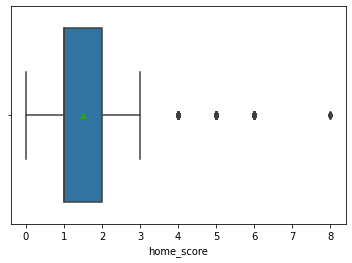

In [102]:
# Checking for outliers in our columns
sns.boxplot(merged['home_score'], showmeans=True)

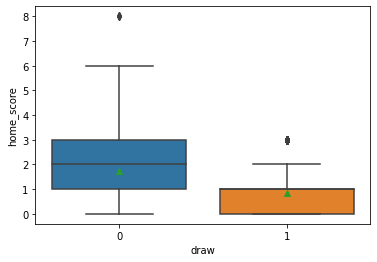

In [103]:
sns.boxplot(data=merged,x='draw',y='home_score',showmeans=True)

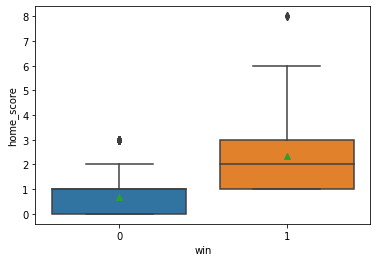

In [104]:
sns.boxplot(data=merged, x='win', y='home_score', showmeans=True)

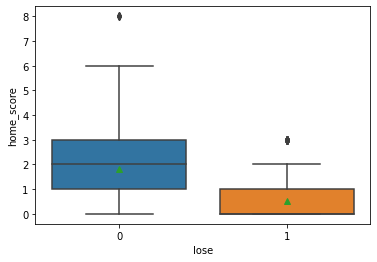

In [105]:
sns.boxplot(data=merged,x='lose',y='home_score',showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


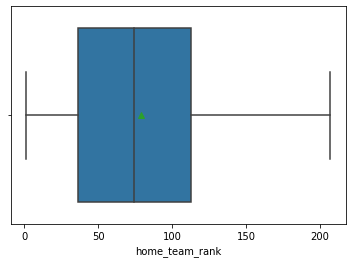

In [106]:
sns.boxplot(merged['home_team_rank'], showmeans=True)

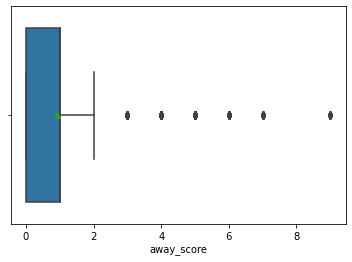

In [107]:
sns.boxplot(x=merged['away_score'],showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


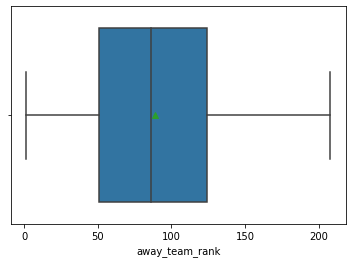

In [108]:
sns.boxplot(merged['away_team_rank'],showmeans=True)

It is important to check and deal with outliers since they can distort our regression model if not dealt with. In our case, there are a few outliers in each column and these unexpected events are expected in football. We need that little bit of bias in our model to prevent overfitting. Keeping this bias in our model will help our model predict unexpected results. Therefore I will keep the outliers.

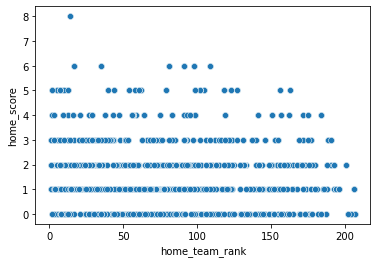

In [109]:
# Ploting the univariate summaries

import seaborn as sns
sns.scatterplot(data=merged, x='home_team_rank',y='home_score')

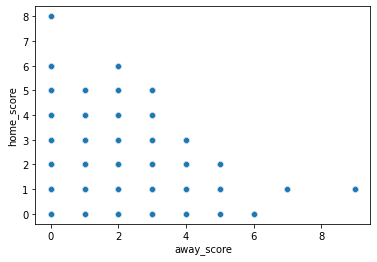

In [110]:
sns.scatterplot(data=merged,x='away_score', y='home_score')

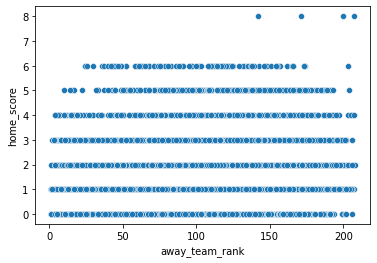

In [111]:
sns.scatterplot(data=merged,x='away_team_rank',y='home_score')

**PREDICTING THE GOALS SCORED BY THE HOME TEAM**

In [112]:
# importing the required libraries

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [113]:
# dropping unnecessary columns

merged.drop(['home_team','away_team','tournament'],axis=1,inplace=True)
merged

,home_score,away_score,home_team_rank,away_team_rank,status,draw,lose,win
167066,0,1,59,65,lose,0,1,0
172284,0,0,29,76,draw,1,0,0
145188,0,2,57,119,lose,0,1,0
208160,1,1,88,109,draw,1,0,0
34825,0,0,173,134,draw,1,0,0
...,...,...,...,...,...,...,...,...
88012,1,2,15,8,lose,0,1,0
19385,1,2,39,25,lose,0,1,0
254855,0,2,96,92,lose,0,1,0
122168,4,3,141,143,win,0,0,1


Before we begin training our model we have to identify our dependent variable and our independent variable(s). Our dependent variable will be the goals scored by the home team which is under the column 'home score'.

In [114]:
# Creating our independent variable X, and dependent variable y

independent=merged.drop(['home_score','status'], axis=1)
X=independent.values
y=merged['home_score'].values

Let us look at how each independent variable relates to the other using correlation to find the VIF score.

In [115]:
# correlations between the variables
correlations = independent.corr()
correlations
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,away_score,home_team_rank,away_team_rank,draw,lose,win
away_score,1.817881,-0.107937,0.092125,-5.122949e+00,-5.854529e+00,-5.423209e+00
home_team_rank,-0.107937,1.345459,-0.649599,-1.536490e+00,-1.640920e+00,-1.590115e+00
away_team_rank,0.092125,-0.649599,1.348592,1.538176e+00,1.624437e+00,1.552719e+00
draw,-5.119829,-1.536308,1.538362,-2.639571e+13,-2.529645e+13,-2.978476e+13
lose,-5.853595,-1.641397,1.625735,-2.529645e+13,-2.424296e+13,-2.854436e+13
win,-5.421668,-1.590274,1.553343,-2.978476e+13,-2.854436e+13,-3.360895e+13


The draw, lose, and win column have a really high score indicating a high amount of collinearity. Win however has the highest VIF score. Let us drop it and see the effect on other columns.

In [116]:
new = independent.drop(columns=['win'])

correlations =new.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,away_score,home_team_rank,away_team_rank,draw,lose
away_score,1.817881,-0.107937,0.092125,-0.315064,-1.248927
home_team_rank,-0.107937,1.345459,-0.649599,-0.126982,-0.290763
away_team_rank,0.092125,-0.649599,1.348592,0.161766,0.306469
draw,-0.315064,-0.126982,0.161766,1.209442,0.655993
lose,-1.248927,-0.290763,0.306469,0.655993,2.121749


The VIF scores in the lose and draw column have reduced significantly indicating that win, draw and lose were colinear.

We then create our train and test sets. After that we can now pass our learning algorithm through the train set to recognize patterns in our dataset, which can later be used to predict the desired outcome. Our test set is used to validate how good our model is at predicting the dependent variable.

**POLYNOMIAL REGRESSION USING ONE INDEPENDENT VARIABLE**

In [117]:
# Checking which independent variable has the largest weight on home_score.
# Label encoding our status column
merged['status']=en.fit_transform(merged['status'])
merged.corr()

,home_score,away_score,home_team_rank,away_team_rank,status,draw,lose,win
home_score,1.000000,-0.106045,-0.142106,0.166538,0.538795,-0.313991,-0.415601,0.631237
away_score,-0.106045,1.000000,0.148459,-0.136902,-0.266238,-0.056023,0.646071,-0.499065
home_team_rank,-0.142106,0.148459,1.000000,0.434951,-0.078986,-0.002596,0.162405,-0.135631
away_team_rank,0.166538,-0.136902,0.434951,1.000000,0.119796,-0.040882,-0.152781,0.165988
status,0.538795,-0.266238,-0.078986,0.119796,1.000000,-0.880645,-0.149703,0.907585
draw,-0.313991,-0.056023,-0.002596,-0.040882,-0.880645,1.000000,-0.336603,-0.600335
lose,-0.415601,0.646071,0.162405,-0.152781,-0.149703,-0.336603,1.000000,-0.551006
win,0.631237,-0.499065,-0.135631,0.165988,0.907585,-0.600335,-0.551006,1.000000


In [118]:
# Splitting the dataset into train and test sets
# We have 80% of our dataset as our train set and the remaining 20% as our test set


X=merged['status'].values.reshape(-1,1)
y=merged['home_score'].values.reshape(-1,1)

# Training using 80% of our data
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


In [119]:
# Fit polynomial Regression to the dataset with two degrees of freedom
poly_reg = PolynomialFeatures(degree = 5) 
X_poly = poly_reg.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


pol_reg.predict(poly_reg.fit_transform([[2]]))



array([[2.32887219]])

**LINEAR REGRESSION FOR PREDICTION**

We will now use our revised independent variable which I have named 'new'.

In [120]:
# Using the independent and dependent variables to predict the home score

X=new.values
y=merged['home_score'].values
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit Linear Regression model to the dataset
reg_line = LinearRegression()
reg_line.fit(X,y)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_predict = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,2043.000000,2043.000000
mean,1.488497,1.513069
std,1.302164,0.948499
min,0.000000,-0.710202
25%,1.000000,0.638660
50%,1.000000,1.859145
75%,2.000000,2.221274
max,8.000000,4.268990


After getting our predictions, we can calculate the Root Mean Squared error which is the magnitude of the error between the prediction and the actual observation.

In [121]:
# Checking the root mean squared error.

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.6324313658474653
Mean Squared Error: 0.8068564913746652
Root Mean Squared Error: 0.8982519086395894


In [122]:
print(y_test.max())
print(y_test.min())

8
0


As you can see above, our dependent variable ranges from 0 to 8 with an RMSE OF 0.898. This might look quite big but let us compare it with other RMSE's in different models below.

**CROSS VALIDATING OUR MODEL**

To check if there are better models, we will cross_validate different models. In our case I have used k-fold cross validation with 5 folds.

In [123]:
from sklearn.model_selection import KFold

X=new.values
y=merged['home_score'].values

folds = KFold(n_splits=5)

# using get_n_splits to figure out how many folds we set up
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# Assessing the 5 models based on the folds we created.
RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
# set up the train and test based on the split determined by KFold
# With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set.
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  X_train, X_test
# fitting a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
# Assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.8898151593286705

Training model 2
Model 2 Root Mean Squared Error: 0.9211816048077792

Training model 3
Model 3 Root Mean Squared Error: 0.8771716965362863

Training model 4
Model 4 Root Mean Squared Error: 0.8994209284772772

Training model 5
Model 5 Root Mean Squared Error: 0.8988026887178364


The RMSE in our initial model is the fourth highest after model 2, 4 and 5 . Of all the models we should go with model 3 since it has the lowest RMSE. This might be our optimal model since it has the lowest RMSE value.

To prove that our residuals are centered around a mean that is close to 0, we will perform a heteroskedasticity test. Using the bartlett's test to perform heteroskedasticity, the test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [124]:
import scipy as sp

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_predict, y_test)

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

2223.6358471896096
the variances are homogeneous!


From the results, we can conclude that there are no patterns to the variance and that we should accept the null hypothesis that the variance is centered around the mean.

**PREDICTING THE GOALS SCORED BY THE AWAY TEAM**

We will follow the same procedure as predicting goals scored by the home team. The only difference is that in creating this model we are going to use the away scores as the dependent variable.

In [125]:
# Creating our independent variable X, and dependent variable y

independent=merged.drop(['away_score','status'], axis=1)
X=independent.values
y=merged['away_score'].values

In [126]:
# correlations between the variables
correlations = independent.corr()
correlations
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,home_team_rank,away_team_rank,draw,lose,win
home_score,1.711647,0.171426,-0.181210,3.135124e+00,3.133986e+00,2.584098e+00
home_team_rank,0.171426,1.356220,-0.662278,-1.538680e+00,-1.687323e+00,-1.668241e+00
away_team_rank,-0.181210,-0.662278,1.363107,1.477207e+00,1.601799e+00,1.567798e+00
draw,3.136902,-1.538725,1.476379,-2.659417e+13,-2.548664e+13,-3.000871e+13
lose,3.135335,-1.687014,1.600659,-2.548664e+13,-2.442524e+13,-2.875898e+13
win,2.583656,-1.667640,1.566596,-3.000871e+13,-2.875898e+13,-3.386165e+13


In [127]:
new = independent.drop(columns=['win'])

correlations =new.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,home_team_rank,away_team_rank,draw,lose
home_score,1.711647,0.171426,-0.181210,0.847227,0.941015
home_team_rank,0.171426,1.356220,-0.662278,-0.060837,-0.270673
away_team_rank,-0.181210,-0.662278,1.363107,0.088038,0.270137
draw,0.847227,-0.060837,0.088038,1.574195,0.905318
lose,0.941015,-0.270673,0.270137,0.905318,1.781050


In [128]:
# Using the independent and dependent variables to predict the home score

X=new.values
y=merged['away_score'].values
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit Linear Regression model to the dataset
reg_line = LinearRegression()
reg_line.fit(X,y)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

y_predict = regressor.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,2043.000000,2043.000000
mean,0.902594,0.903374
std,1.132205,0.815657
min,0.000000,-0.392546
25%,0.000000,0.285773
50%,1.000000,0.667636
75%,1.000000,1.362417
max,9.000000,3.217096


In [129]:
# Checking the root mean squared error.

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.5182765063127307
Mean Squared Error: 0.561631721368677
Root Mean Squared Error: 0.7494209240264625


In [138]:
print(y_test.max())
print(y_test.min())

2
0


Our dependent variable ranges from 0 to 2 with an RMSE of 0.749.Let us compare it with other RMSE's in different models below.

In [130]:
from sklearn.model_selection import KFold

X=new.values
y=merged['away_score'].values

folds = KFold(n_splits=5)

# using get_n_splits to figure out how many folds we set up
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# Assessing the 5 models based on the folds we created.
RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
# set up the train and test based on the split determined by KFold
# With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set.
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  X_train, X_test
# fitting a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
# Assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.7109882637443432

Training model 2
Model 2 Root Mean Squared Error: 0.7763209732694017

Training model 3
Model 3 Root Mean Squared Error: 0.6909847106172854

Training model 4
Model 4 Root Mean Squared Error: 0.7357307514139299

Training model 5
Model 5 Root Mean Squared Error: 0.7522247288282177


Our initial RMSE is 0.749 which compared to these other model ranks third highest after model 2 and 5. Picking the best model we should go with model 3 since it has the lowest RMSE.

In [131]:
import scipy as sp

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_predict, y_test)

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

2326.0036676396176
the variances are homogeneous!


There are no patterns to the variance and we should accept the null hypothesis that the variance is centered around the mean.

**LOGISTIC REGRESSION**

We want to find out from the home team's perspective if a game is a win, lose or draw. The status column is infact telling us whether the home team won, lost or drew the game. We will use it as our dependent variable.

In [132]:
merged.head()

,home_score,away_score,home_team_rank,away_team_rank,status,draw,lose,win
167066,0,1,59,65,1,0,1,0
172284,0,0,29,76,0,1,0,0
145188,0,2,57,119,1,0,1,0
208160,1,1,88,109,0,1,0,0
34825,0,0,173,134,0,1,0,0


In [133]:
# Label encoding our status column
merged['status']=en.fit_transform(merged['status'])

In [134]:
# Checking for independence in our variables

features=merged[['home_score','away_score','home_team_rank','away_team_rank']]
features
correlations =features.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_score,away_score,home_team_rank,away_team_rank
home_score,1.093326,0.033237,0.280766,-0.299649
away_score,0.033237,1.078716,-0.267935,0.258681
home_team_rank,0.280766,-0.267935,1.376348,-0.682082
away_team_rank,-0.299649,0.258681,-0.682082,1.381989


We can see that the VIF scores of the variables are low meaning the variables are independent of each other. We can therefore proceed with our modeling using these variables.

In [135]:
merged.head()

,home_score,away_score,home_team_rank,away_team_rank,status,draw,lose,win
167066,0,1,59,65,1,0,1,0
172284,0,0,29,76,0,1,0,0
145188,0,2,57,119,1,0,1,0
208160,1,1,88,109,0,1,0,0
34825,0,0,173,134,0,1,0,0


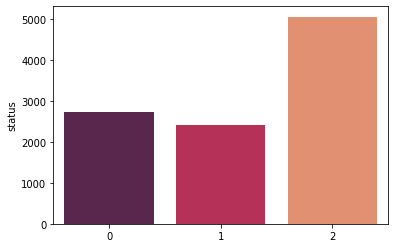

In [136]:
status=merged['status'].value_counts()
sns.barplot(data=merged, x=status.index, y=status, palette='rocket')

We have three possible values in our status column. This is a multinomial logistic regression with 3 variables. 0 represents a draw, 1 represents a lose and 2 represents a win.

Now we train our model.

In [137]:
# Splitting our dataset and creating our model

X=merged.iloc[:, 0:4].values
y=merged.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Fitting our model
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
y_pred = LogReg.predict(X_test)

# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[ 849,    0,    0],
       [   0,  716,    0],
       [   0,    0, 1500]])

The array is a confusion matrix which is telling us that 849, 716 and 1500 are the number of correct predictions. There are no incorrect predictions. We can use hyperparameter tuning to find a set optimal values which cannot be estimated from the regular training process.

In [68]:
# Performing hyperparameter tuning

from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

X=merged.iloc[:, 0:4].values
y=merged.iloc[:, 4].values

# Creating the logistic regression
logistic = linear_model.LogisticRegression()

# Creating regularization penalty space
penalty = ['l1', 'l2']
# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)
# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fitting grid search
best_model = clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [69]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [70]:
# Predicting target vector
best_model.predict(X)

array([2, 1, 1, ..., 0, 2, 2])

**CONCLUSION**

After creating our predictive models, we can either decide to use our initial models or one of our k-fold models in predicting a new set of data. We also have a classifying model which predicts whether a team will win, lose or draw.